<a href="https://colab.research.google.com/github/gmiserani/fisica-computacional/blob/main/Ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Termalização
Nome: Gabriela Moraes Miserani de Freitas

Matrícula: 2020006566

In [91]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
from numba import jit

In [92]:
@jit(nopython=True)
def vizinhos(N):
  #Define a tabela de vizinhos
  L=int(np.sqrt(N))
  viz = np.zeros((N,4),dtype=np.int16)
  for k in range(N):
    viz[k,0]=k+1
    if (k+1) % L == 0: 
      viz[k,0] = k+1-L
    viz[k,1] = k+L
    if k > (N-L-1): 
      viz[k,1] = k+L-N
    viz[k,2] = k-1
    if (k % L == 0): 
      viz[k,2] = k+L-1
    viz[k,3] = k-L
    if k < L: 
      viz[k,3] = k+N-L
  return viz

In [93]:
@jit(nopython=True)
def energia(s,viz):
  #Calcula a energia da configuração representada no array s
  N=len(s)
  ener = 0
  for i in range(N):
    h = s[viz[i,0]]+s[viz[i,1]] # soma do valor dos spins a direita e acima
    ener -= s[i]*h
  return ener

In [94]:
@jit(nopython=True)
def expos(beta):
  #constroi a tabela de expoentes
  ex = np.zeros(5,dtype=np.float32)
  ex[0]=np.exp(8.0*beta)
  ex[1]=np.exp(4.0*beta)
  ex[2]=1.0
  ex[3]=np.exp(-4.0*beta)
  ex[4]=np.exp(-8.0*beta)
  return ex

In [95]:
@jit(nopython=True)
def gera_spin(L):
  #gera a rede inicial aleatoria
  s = []
  N = L*L
  for i in range(N):
      s.append(2*np.random.randint(2)-1)
  return s, N

In [96]:
@jit(nopython=True)
def magnetizacao(S, N):
  #calcula a magnetizacao do sistema
  mag = 0
  for i in range(N):
    mag += S[i]
  return mag

In [97]:
@jit(nopython=True)
def metropolis(S, N, viz, energia, mag, exp):
  #aplica o algoritmo de metropolis
  for i in range(N):
    Si = S[i]
    h = S[viz[i,0]]+S[viz[i,1]]+S[viz[i,2]]+S[viz[i,3]] # soma dos vizinhos
    de = int(S[i]*h*0.5+2)
    P = exp[int(de)]
    if P >= np.random.random():
      energia += 2*Si*h
      mag += 2 * (-1 * Si)
      S[i] = -1 * S[i]
  return energia, mag, S

In [98]:
@jit(nopython=True)
def Ising(L, temp, passos):
  #aplica o Ising usando o algoritmo de metropolis
  S, N = gera_spin(L)
  viz = vizinhos(N)
  energia_lista = []
  mag_lista = []
  exp = expos(1/temp)
  for i in range(passos):
    energ = energia(S, viz)
    mag = magnetizacao(S, N)
    energ, mag, S = metropolis(S, N, viz, energ, mag, exp)
    energia_lista.append(energ)
    mag_lista.append(mag)

  return energia_lista, mag_lista

# L = 24

Temperatura = 0.4

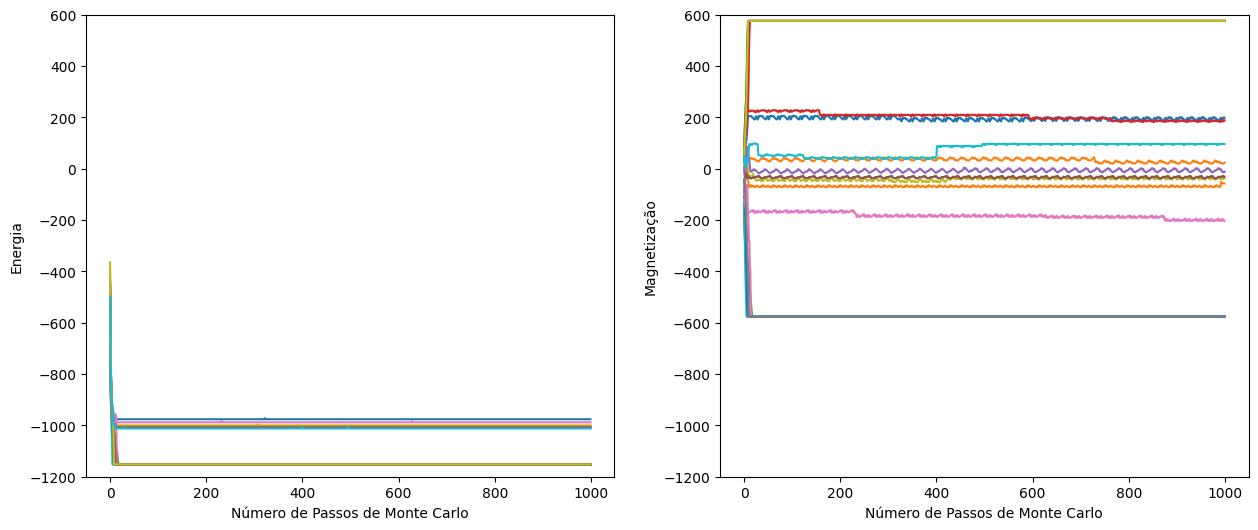

In [99]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-1200, 600])
axs[1].set_ylim([-1200, 600])
for i in range(20):
  energia_lista, mag_lista = Ising(24,0.4,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

A partir da análise do grafico é perceptivel que ambas Energia e magnetização convergem com um numero de passos razoavelmente pequeno, apesar de a magnetizacao apresentar certa instabilidade até próximo ao passo mil.

Temperatura = 0,8

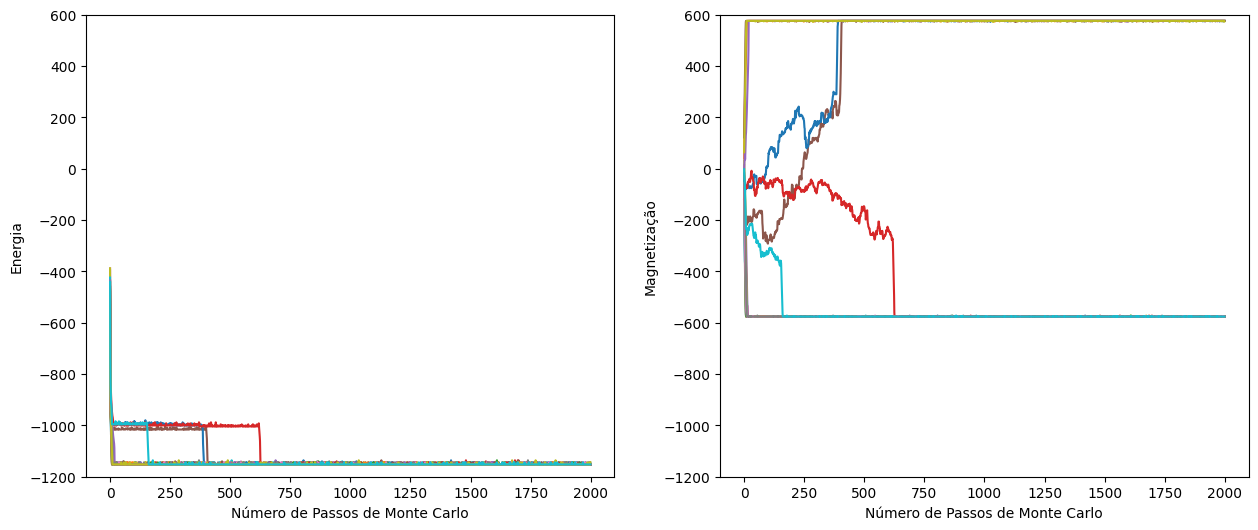

In [100]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-1200, 600])
axs[1].set_ylim([-1200, 600])
for i in range(20):
  energia_lista, mag_lista = Ising(24,0.8,2000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Ao contrário do visto na temperatura 0.4, o sistema na temperatura de 0.8 aparenta ser mais instável, precisando de mais passos de Monte Carlo para alcançar a estabilidade.

Temperatura = 1.2

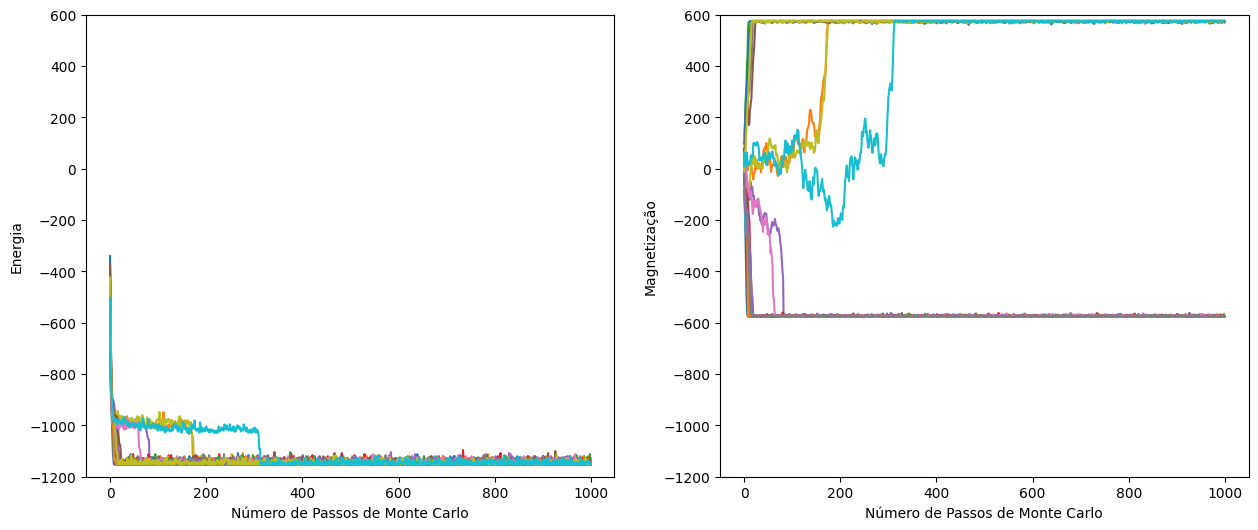

In [101]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-1200, 600])
axs[1].set_ylim([-1200, 600])
for i in range(20):
  energia_lista, mag_lista = Ising(24,1.2,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Nesse caso, devido à maior temperatura, o número de passos necessários foi um pouco menor que no caso anterior, chegando a cerca de 700 passos de Monte Carlo

Temperatura = 1.6

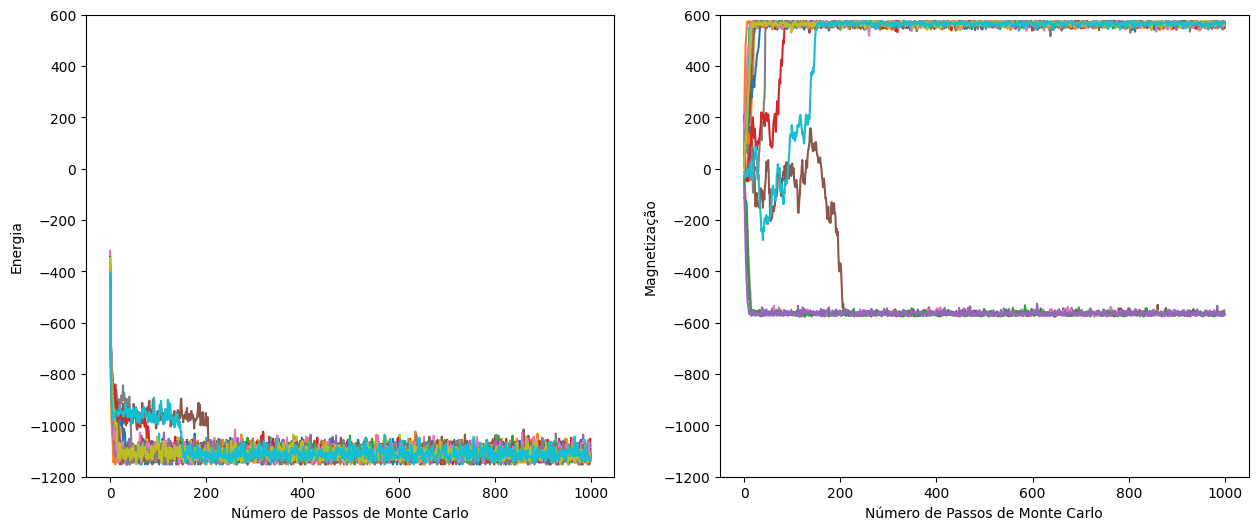

In [102]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-1200, 600])
axs[1].set_ylim([-1200, 600])
for i in range(20):
  energia_lista, mag_lista = Ising(24,1.6,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Nesse caso, a estabilidade é alcançada com ainda menos passos, mas pode ser visto não é 100% estável, já que ainda há ocilações constantes

Temperatura = 2.0

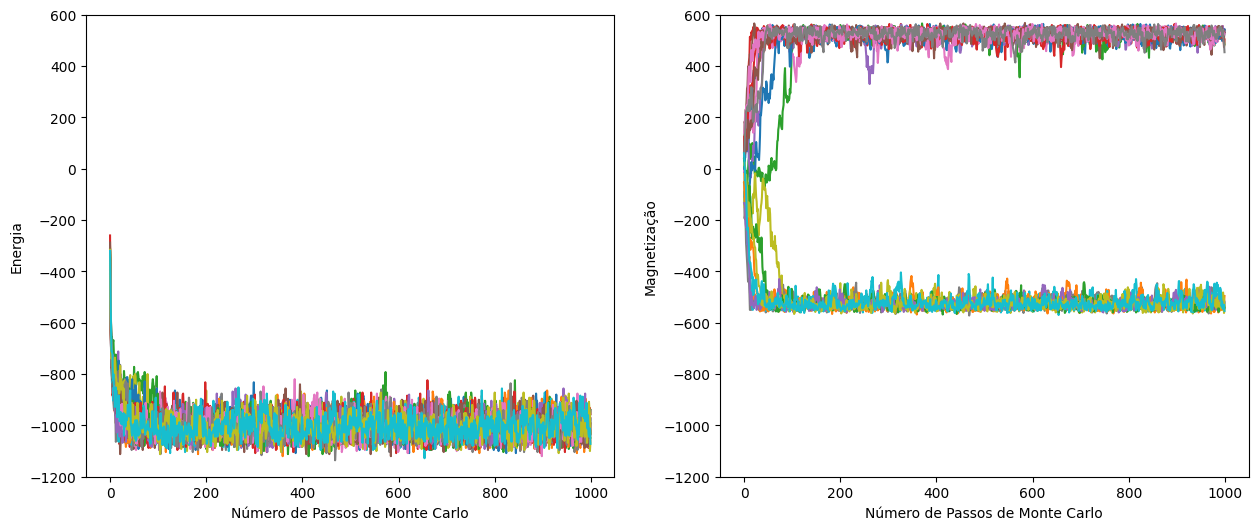

In [103]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-1200, 600])
axs[1].set_ylim([-1200, 600])
for i in range(20):
  energia_lista, mag_lista = Ising(24,2.0,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Assim como no caso anterior, mesmo após alcançar a estabilidade, com poucos passos,ainda existem ocilações constantes.



Temperatura = 2.4

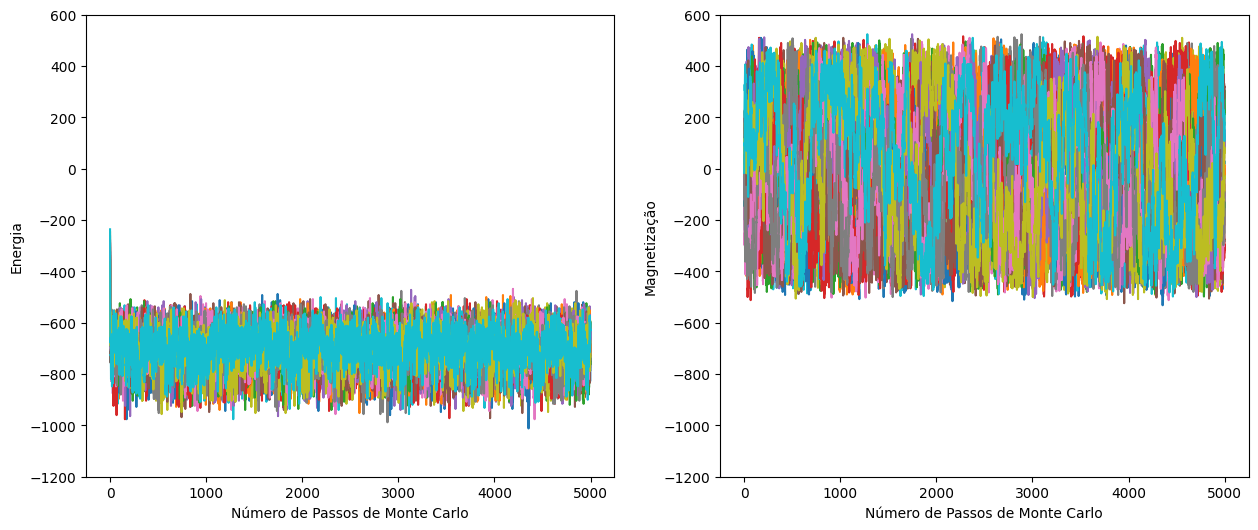

In [104]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-1200, 600])
axs[1].set_ylim([-1200, 600])
for i in range(20):
  energia_lista, mag_lista = Ising(24,2.4,5000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Nesa temperatura, as ocilações atingem certa estabilidade muito rapidamente, não precisando de muitos passos de monte carlo.



Temperatura = 3.0

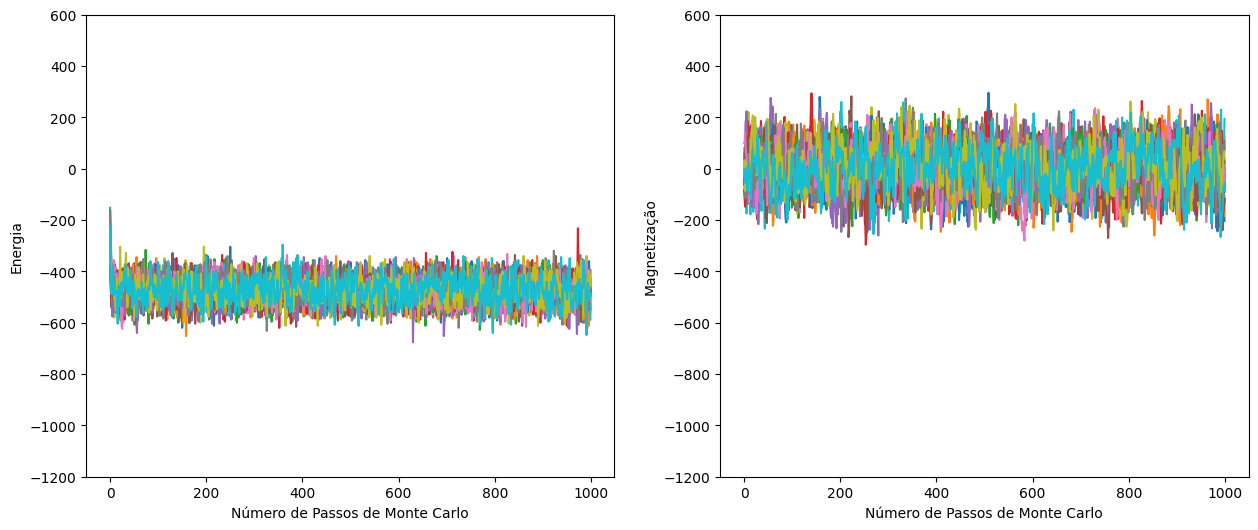

In [105]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-1200, 600])
axs[1].set_ylim([-1200, 600])
for i in range(20):
  energia_lista, mag_lista = Ising(24,3.0,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Assim como no caso anterior, é perceptivel a necessidade de pocos passos de Monte Carlo para atingir a estabilidade, podendo levar à conclusão de que quanto maior a temperatura, menos passos de Monte Carlo são necessários

# L = 30

Temperatura = 0.4

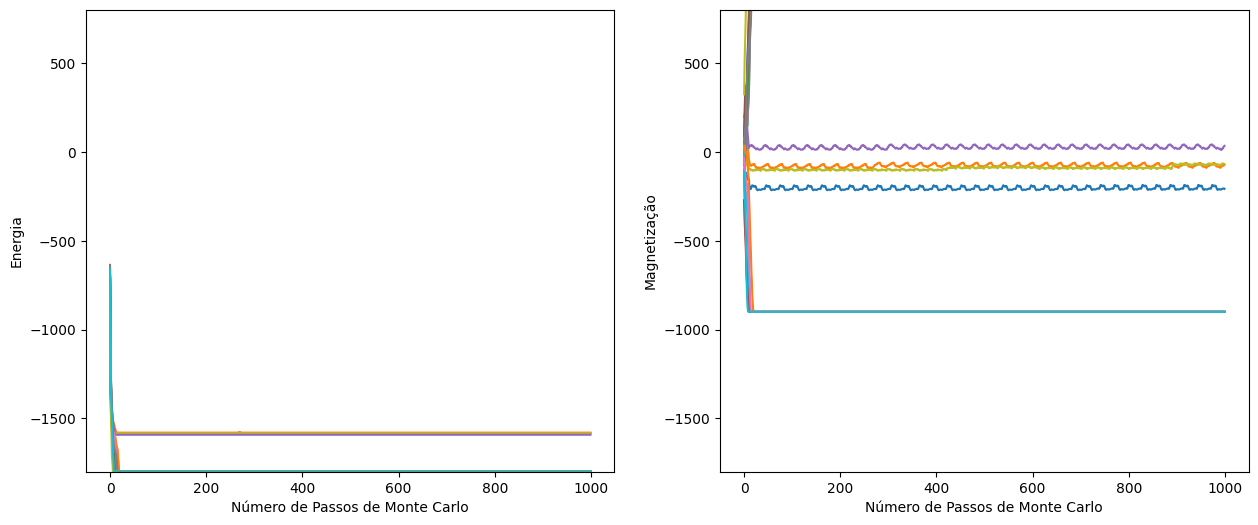

In [106]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-1800, 800])
axs[1].set_ylim([-1800, 800])
for i in range(20):
  energia_lista, mag_lista = Ising(30,0.4,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Assim como na temperatura equivalente do passo anterior, com L=24, pode-se perceber que o equilibrio é alcançado rapidamente, apesar de haver determinadas ocilações irregulares no magnetismo

Temperatura = 0,8

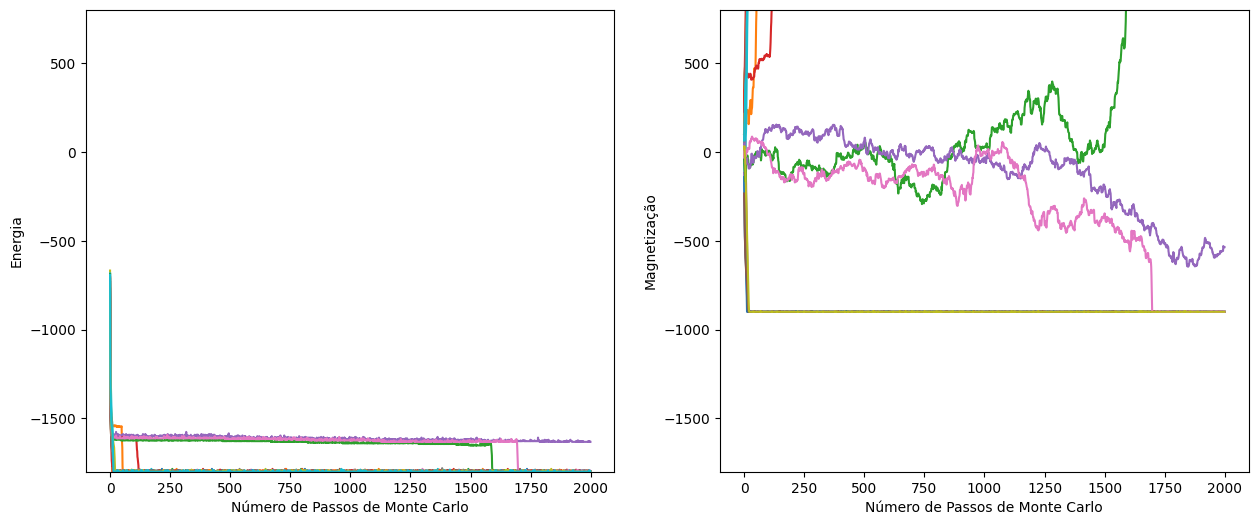

In [107]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-1800, 800])
axs[1].set_ylim([-1800, 800])
for i in range(20):
  energia_lista, mag_lista = Ising(30,0.8,2000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Nesse caso, com a temperatura baixa, foram necessários muitos passos de Monte Carlo para alcançar a estabilidade reforçando a ideia de, quanto menor a temperatura, maior a instabilidade

Temperatura = 1.2

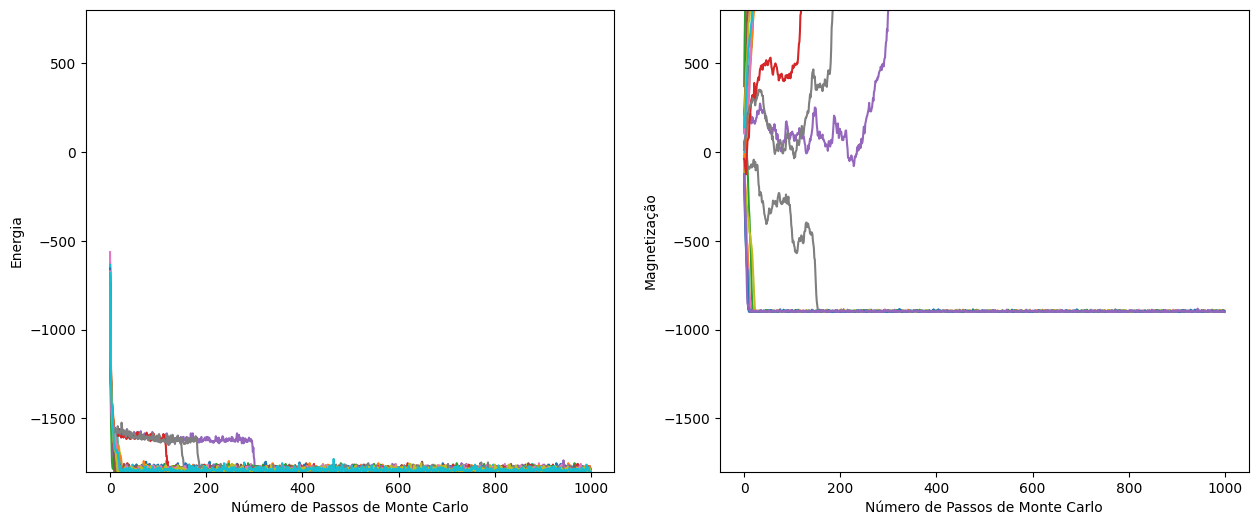

In [108]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-1800, 800])
axs[1].set_ylim([-1800, 800])
for i in range(20):
  energia_lista, mag_lista = Ising(30,1.2,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Nesse caso, a estabilidade é alcançada mais rapidamente que no caso anterior, provavelmente devido ao fato de a temperatura ser maior. Apesar disso, assim como no L=24, há diversas ocilacoes, principalmente no magnetismo

Temperatura = 1.6

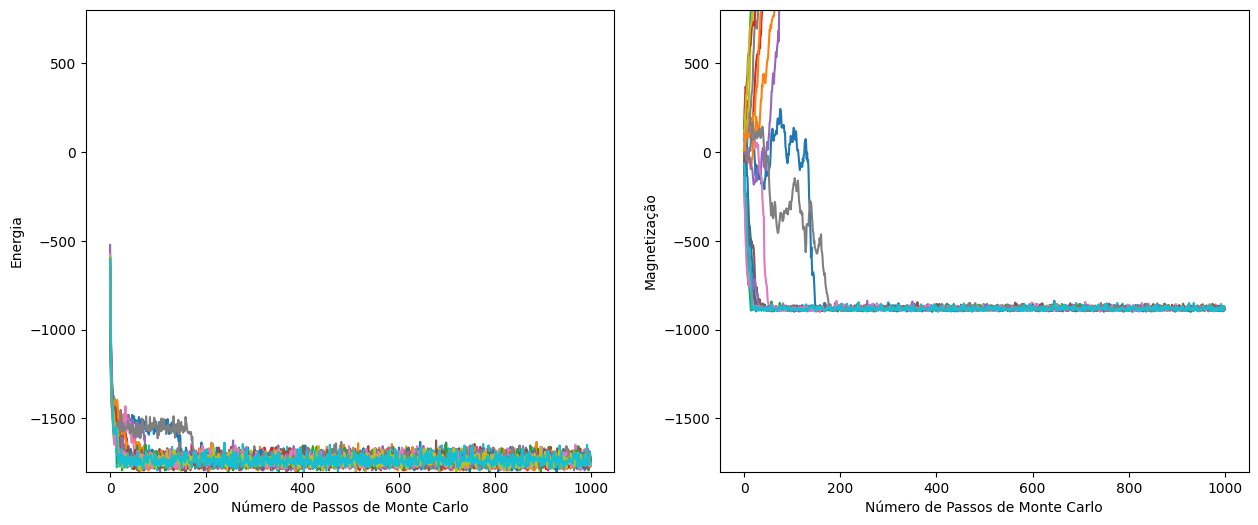

In [109]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-1800, 800])
axs[1].set_ylim([-1800, 800])
for i in range(20):
  energia_lista, mag_lista = Ising(30,1.6,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Como esperado, ao aumentar a temperatura em relacao ao passo anterior, há uma diminuição do número de passos necessários

Temperatura = 2.0

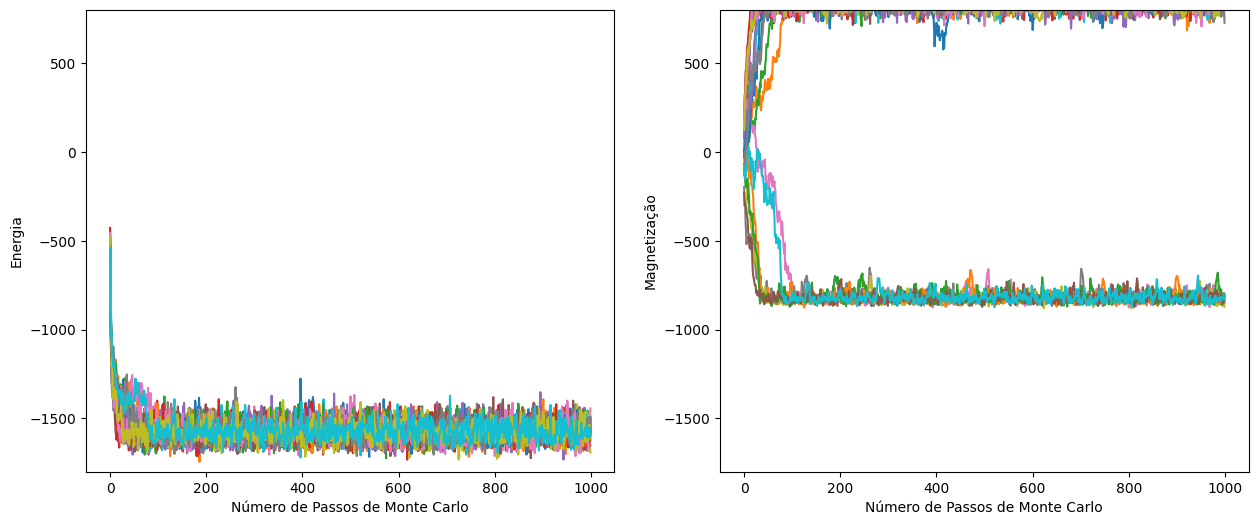

In [110]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-1800, 800])
axs[1].set_ylim([-1800, 800])
for i in range(20):
  energia_lista, mag_lista = Ising(30,2.0,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Esse passo é bem similar ao anterior, com uma quantidade semelhante de passos e com as ocilações constantes já percebidas anteriormente

Temperatura = 2.4

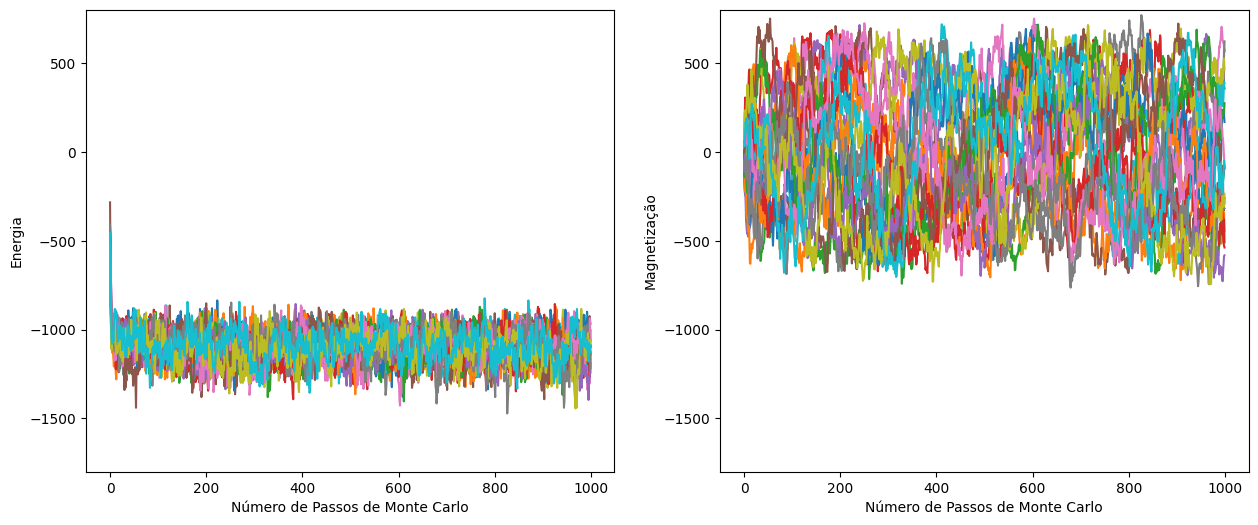

In [111]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-1800, 800])
axs[1].set_ylim([-1800, 800])
for i in range(20):
  energia_lista, mag_lista = Ising(30,2.4,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Nesse caso, as ocilações, apesar de constantes, são maiores que as percebidas nos casos anteriores, tornando dificil a percepção da estabilidade. Ainda assim, é possível perceber que chega nesse ponto de relativa estabilidade mais rapidamente que nos casos anteriores.

Temperatura = 3.0

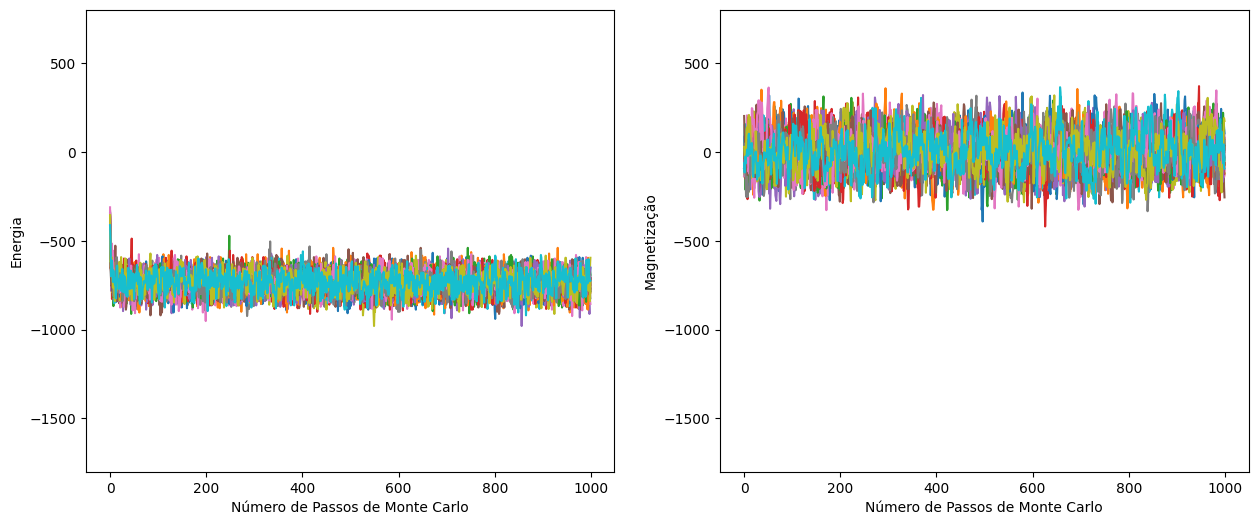

In [112]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-1800, 800])
axs[1].set_ylim([-1800, 800])
for i in range(20):
  energia_lista, mag_lista = Ising(30,3.0,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Seguindo o padrão, a maior temperatura exige um menor número de passos de Monte Carlo.

# L = 50

Temperatura = 0.4

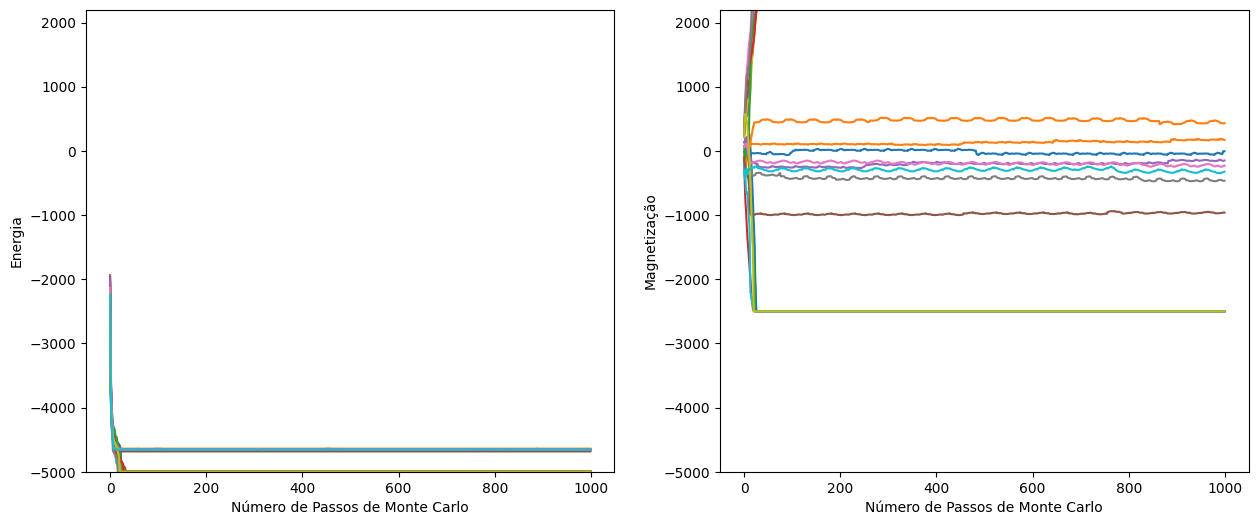

In [113]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-5000, 2200])
axs[1].set_ylim([-5000, 2200])
for i in range(20):
  energia_lista, mag_lista = Ising(50,0.4,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Assim como os outros casos que seguiram a temperatura de 0.4, esse caso também foge um pouco do padrão, alcançando a estabilidade com poucos passos, apesar da baixa temperatura



Temperatura = 0,8

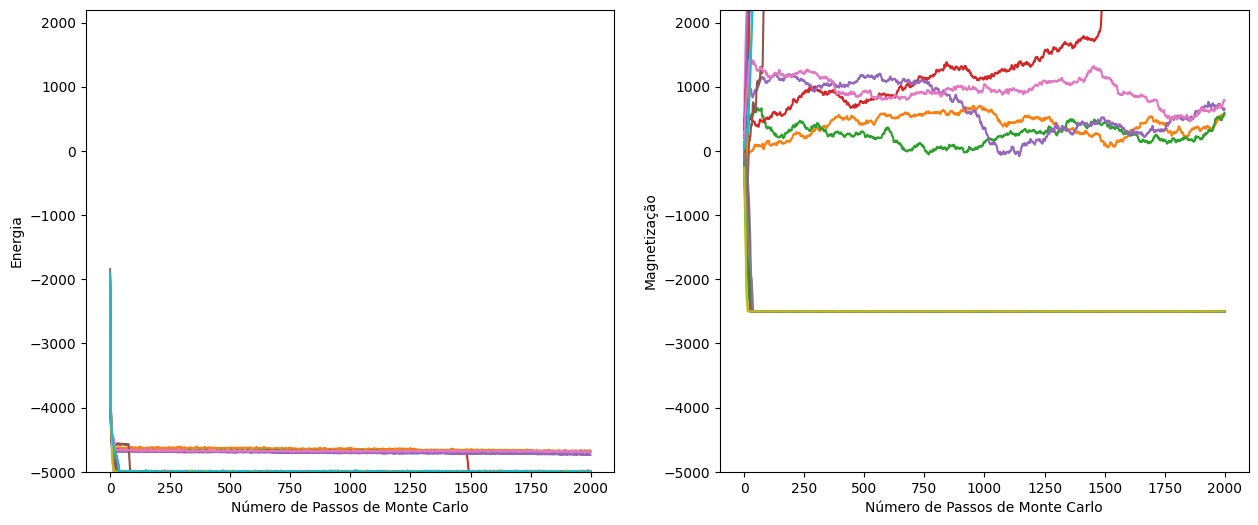

In [114]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-5000, 2200])
axs[1].set_ylim([-5000, 2200])
for i in range(20):
  energia_lista, mag_lista = Ising(50,0.8,2000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Apesar da temperatura aparenter chegar rapidamente à estabilidade, é possível ver que existe certa instabilidade, principalmente quando se ve no magnetismo. Assim, é possível perceber que segue o padrão esperado da instabilidade em temperaturas mais baixas.

Temperatura = 1.2

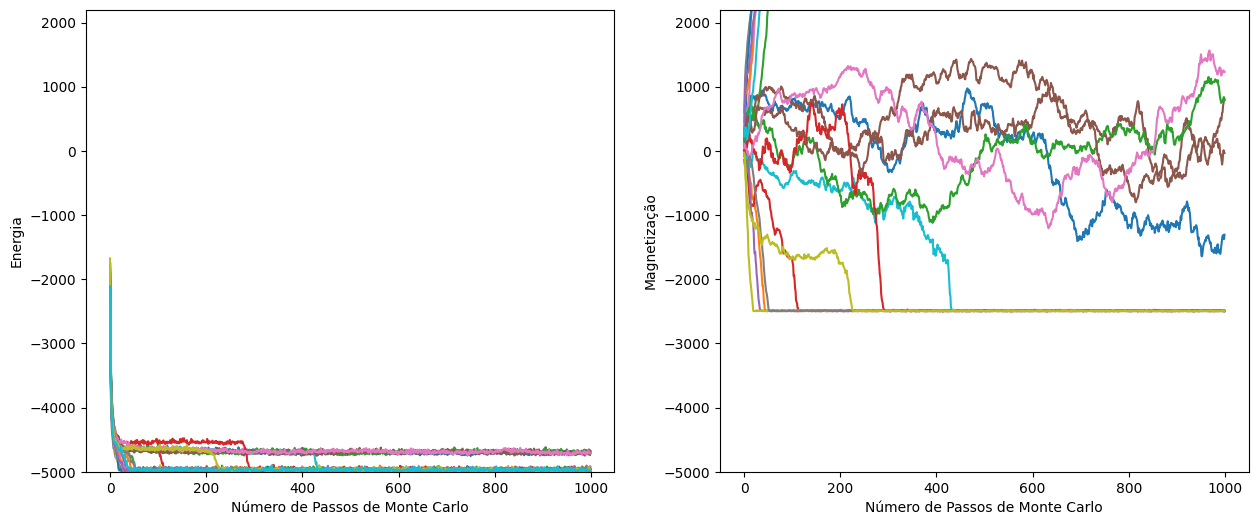

In [115]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-5000, 2200])
axs[1].set_ylim([-5000, 2200])
for i in range(20):
  energia_lista, mag_lista = Ising(50,1.2,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Ao contrário do gráfico anterior, no caso da temperatura igual à 1.2 a estabilidade é alcançada mais rapidamente, necessitando de um numero menor de passos para chegar à estabilidade

Temperatura = 1.6

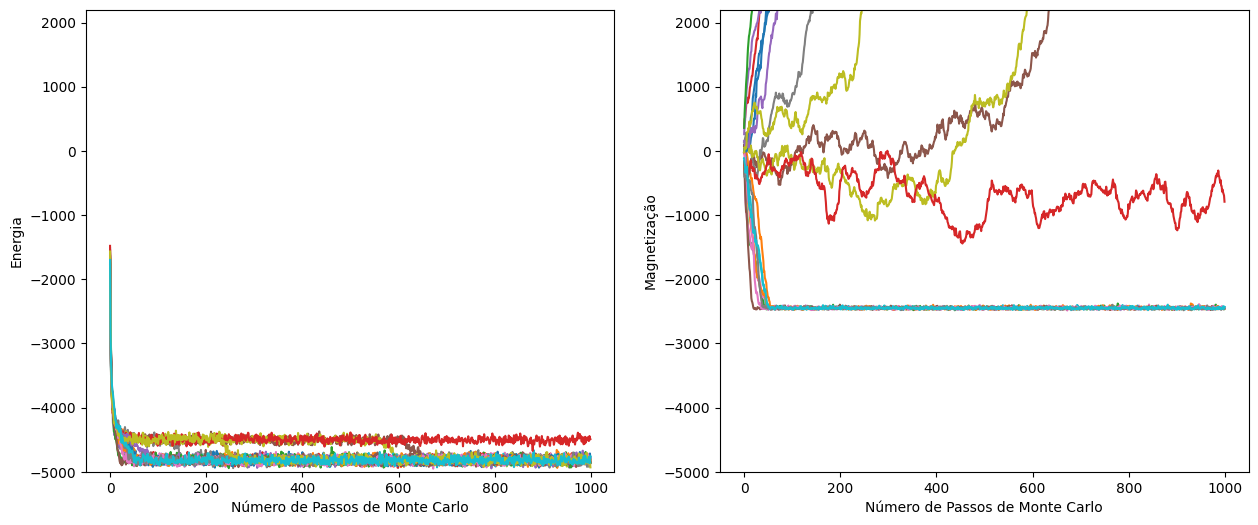

In [116]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-5000, 2200])
axs[1].set_ylim([-5000, 2200])
for i in range(20):
  energia_lista, mag_lista = Ising(50,1.6,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Assim como ocorreu nos tamanhos de L anteriores, chega-se à estabilidade com ainda menos passos, apesar de ainda haver ocilações constantes, como já esperava-se

Temperatura = 2.0

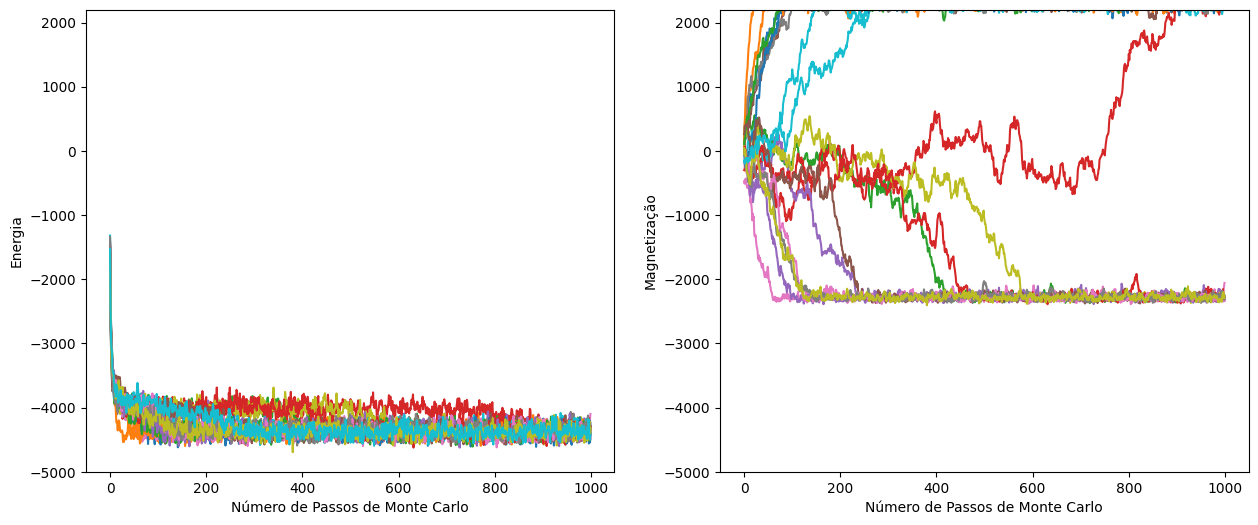

In [117]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-5000, 2200])
axs[1].set_ylim([-5000, 2200])
for i in range(20):
  energia_lista, mag_lista = Ising(50,2.0,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

O gráfico segue o comportamento esperado, tanto em relação ao número de passos quanto em relação às ocilações constantes que apresenta.

Temperatura = 2.4

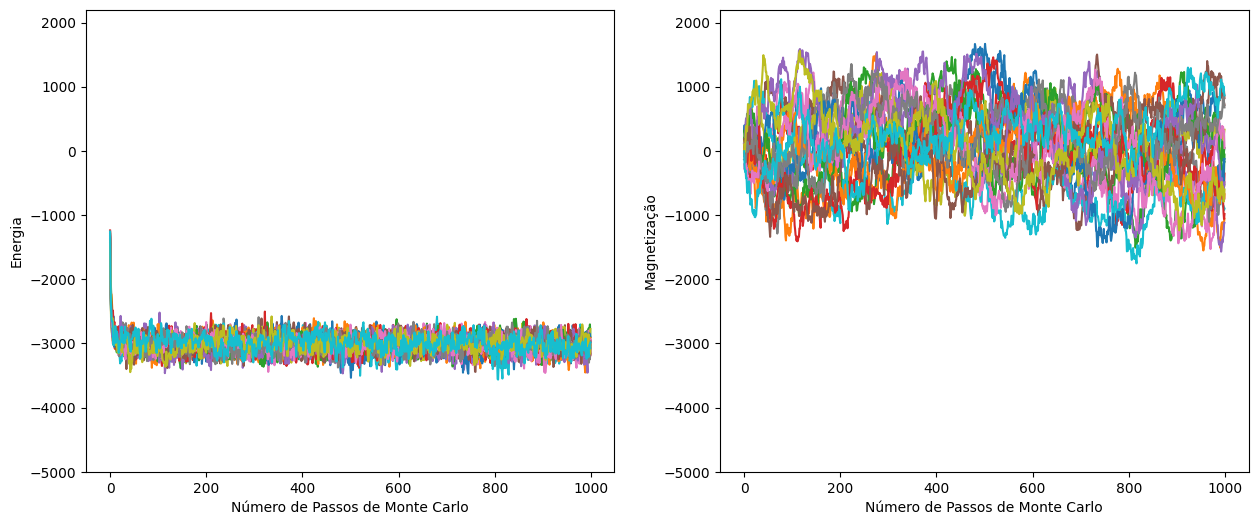

In [118]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-5000, 2200])
axs[1].set_ylim([-5000, 2200])
for i in range(20):
  energia_lista, mag_lista = Ising(50,2.4,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

A estabilidade é alcançada repidamente nesse caso, seguindo o comportamento esperado

Temperatura = 3.0

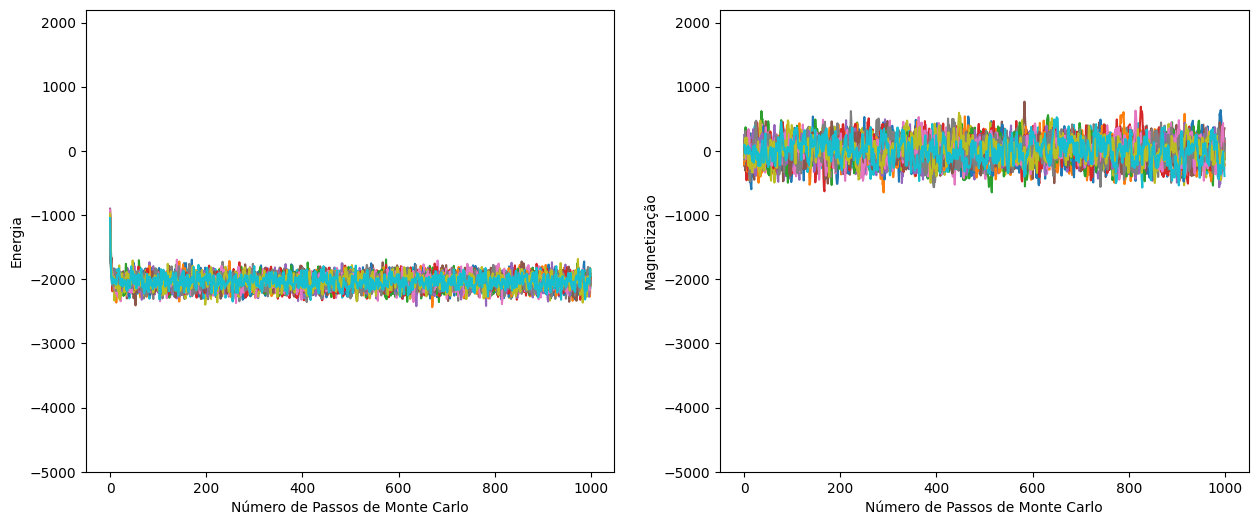

In [119]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-5000, 2200])
axs[1].set_ylim([-5000, 2200])
for i in range(20):
  energia_lista, mag_lista = Ising(50,3.0,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Nesse último caso analisado para esse tamanho de L, podemos perceber que a estabilidade é alcançada muito rapidamente, mantendo, assim, a conclusão de quanto maior a temperatura, menos passos seriam necessários.

# L = 80

Temperatura = 0.4

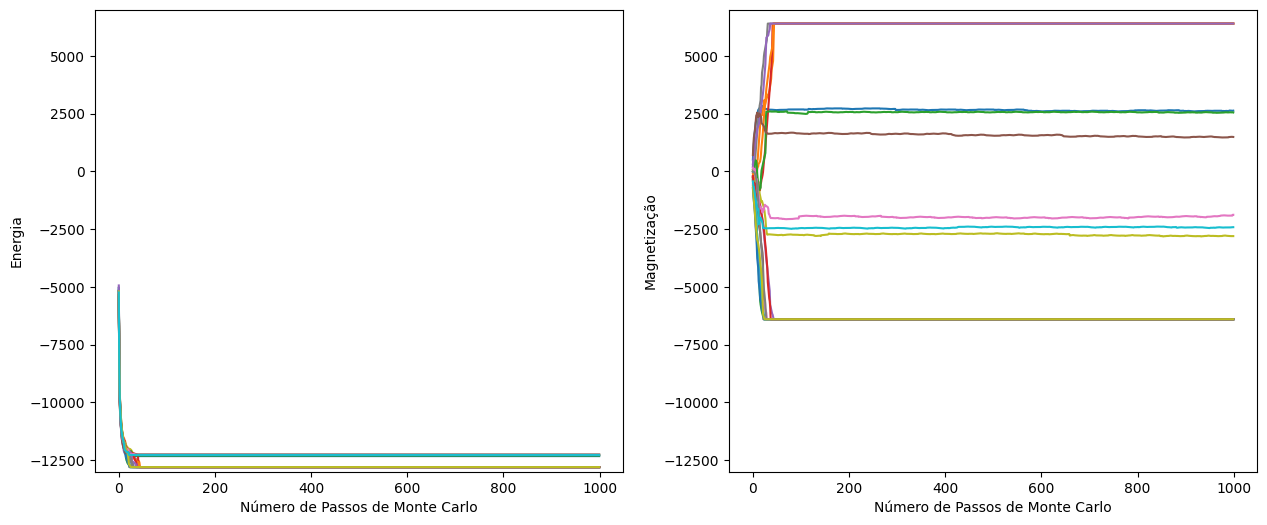

In [120]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-13000, 7000])
axs[1].set_ylim([-13000, 7000])
for i in range(20):
  energia_lista, mag_lista = Ising(80,0.4,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

A partir da análise do grafico é perceptivel que ambas Energia e magnetização convergem com um numero de passos pequeno, como visto na mesma temperatura nos diferentes tamanhos de rede.

Temperatura = 0,8

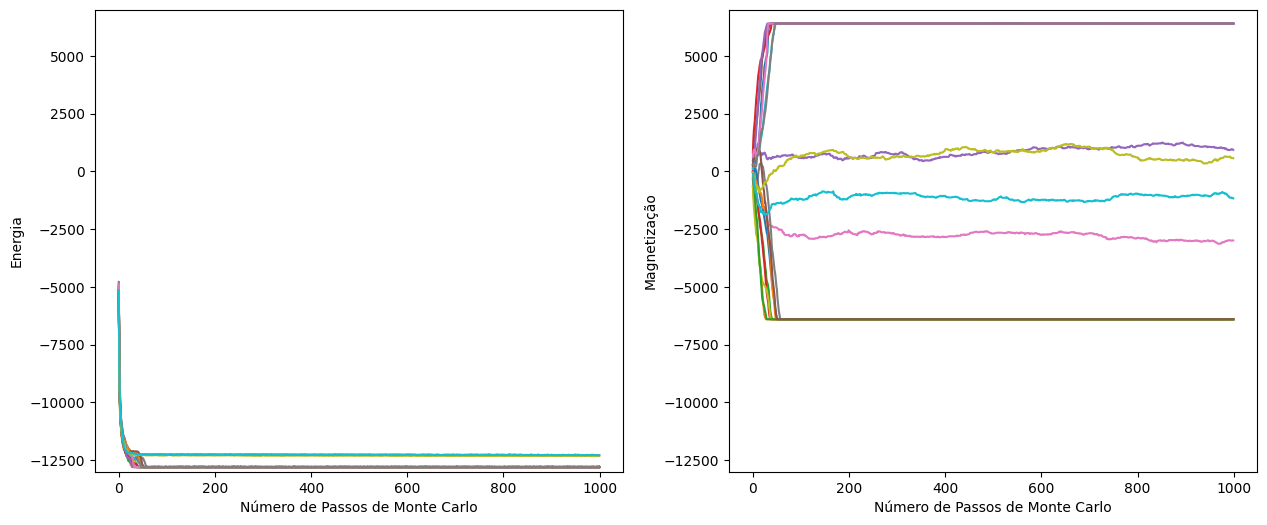

In [121]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-13000, 7000])
axs[1].set_ylim([-13000, 7000])
for i in range(20):
  energia_lista, mag_lista = Ising(80,0.8,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Ao contrário do visto anteriormente, a estabilidade nessa temperatura não é tao demorada como o esperado, visto a situação com a mesma temperatura e outros tamanhos de rede. 

Temperatura = 1.2

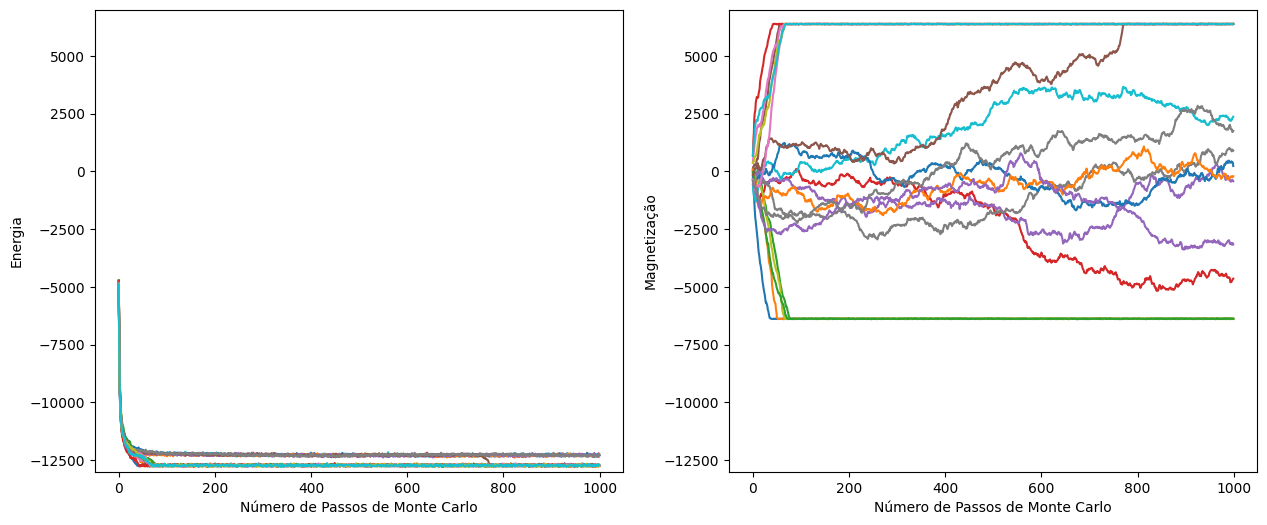

In [122]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-13000, 7000])
axs[1].set_ylim([-13000, 7000])
for i in range(20):
  energia_lista, mag_lista = Ising(80,1.2,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Esse caso é bem semelhante ao anterior, com uma estabilidade alcançada com um número relativamente baixo de passos

Temperatura = 1.6

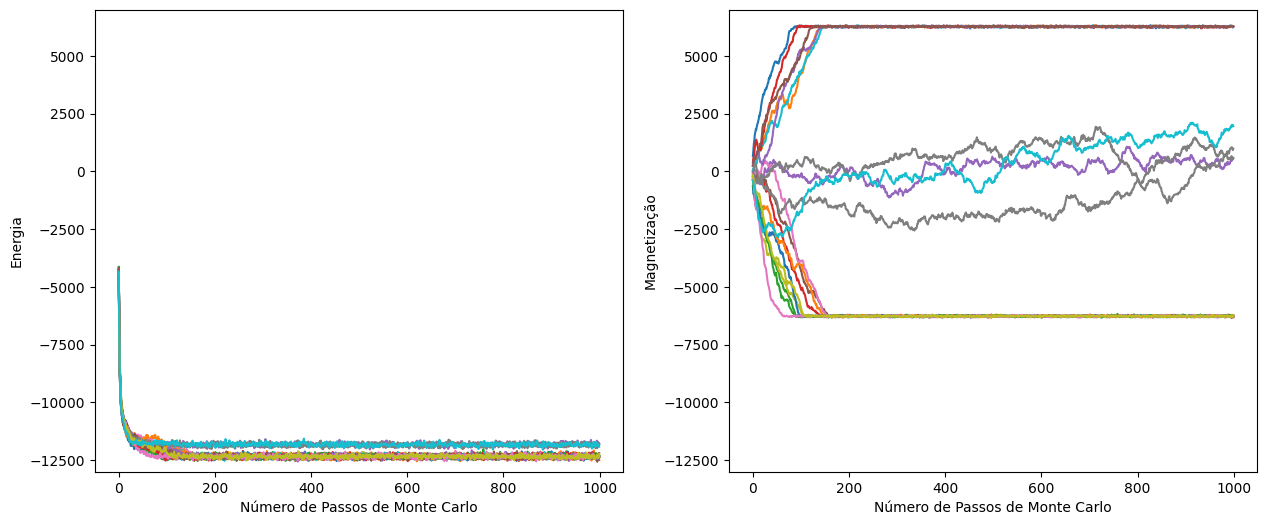

In [123]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-13000, 7000])
axs[1].set_ylim([-13000, 7000])
for i in range(20):
  energia_lista, mag_lista = Ising(80,1.6,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Assim como esperado, o aumento da temperatura diminui o número de passos necessários.

Temperatura = 2.0

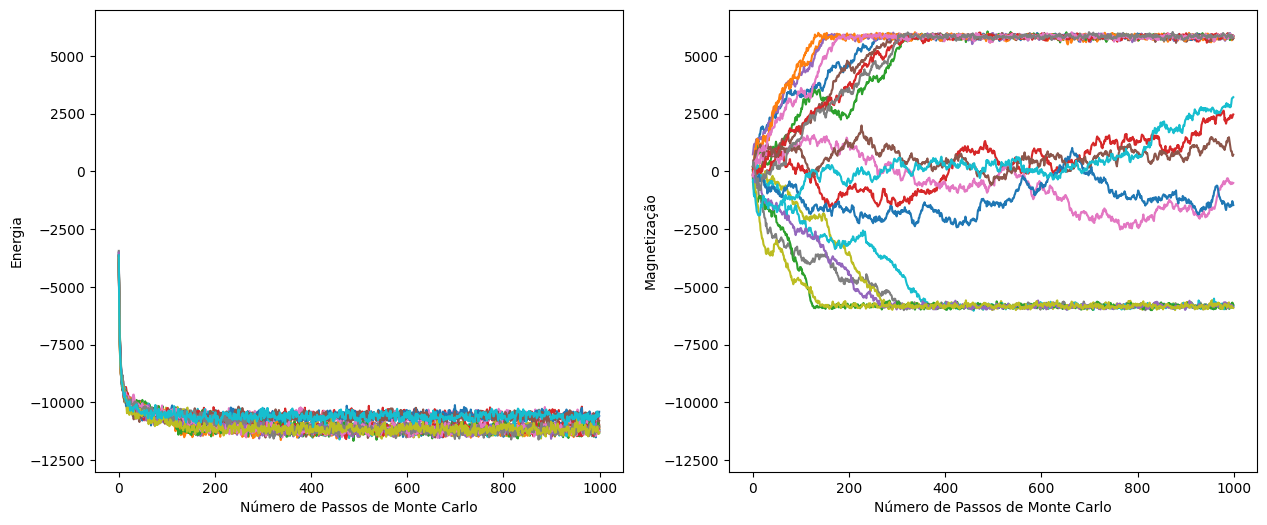

In [124]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-13000, 7000])
axs[1].set_ylim([-13000, 7000])
for i in range(20):
  energia_lista, mag_lista = Ising(80,2.0,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)


No caso da temperatura igual a 2, a estabilidade é alcançada com cerca de 150 passos de Monte Carlo.



Temperatura = 2.4

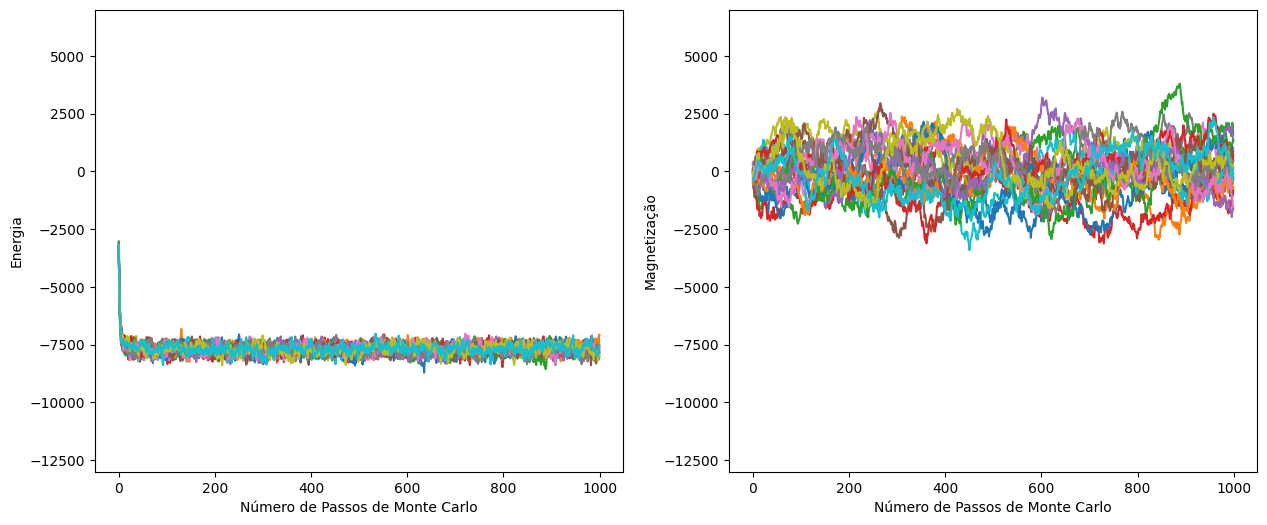

In [125]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-13000, 7000])
axs[1].set_ylim([-13000, 7000])
for i in range(20):
  energia_lista, mag_lista = Ising(80,2.4,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)


Nesse caso a estabilidade é alcançada mais rapidamente, assim como no caso igual em diferentes tamanhos

Temperatura = 3.0

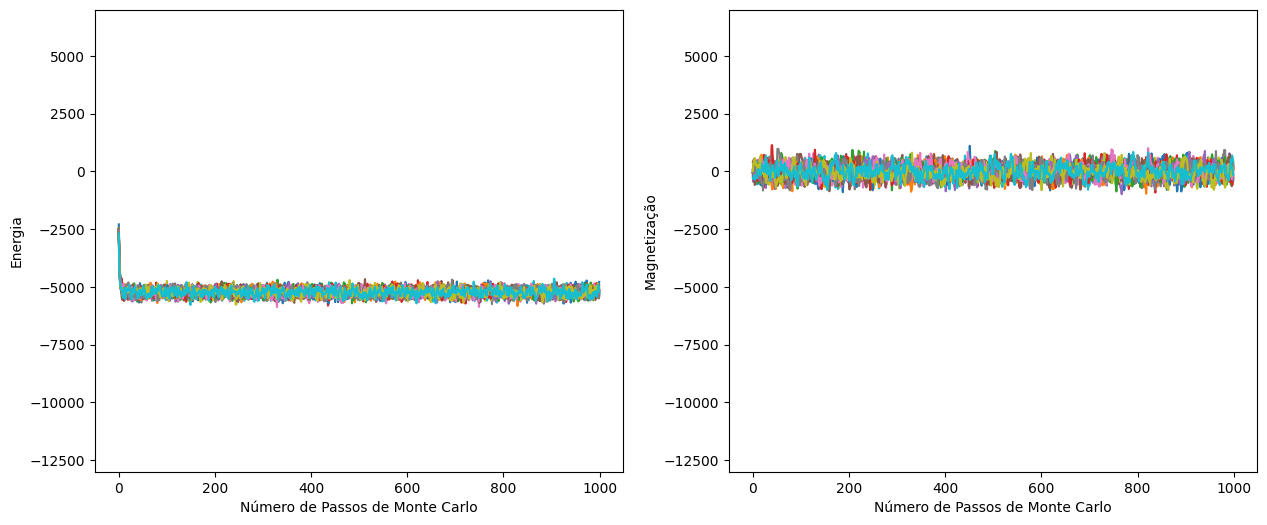

In [126]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-13000, 7000])
axs[1].set_ylim([-13000, 7000])
for i in range(20):
  energia_lista, mag_lista = Ising(80,3.0,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Nesse último caso analisado para esse tamanho de L, podemos perceber que a estabilidade é alcançada muito rapidamente, reforçando a ideia da relação inversa entre aumento da temperatura e numero de passos

# L = 100

Temperatura = 0.4

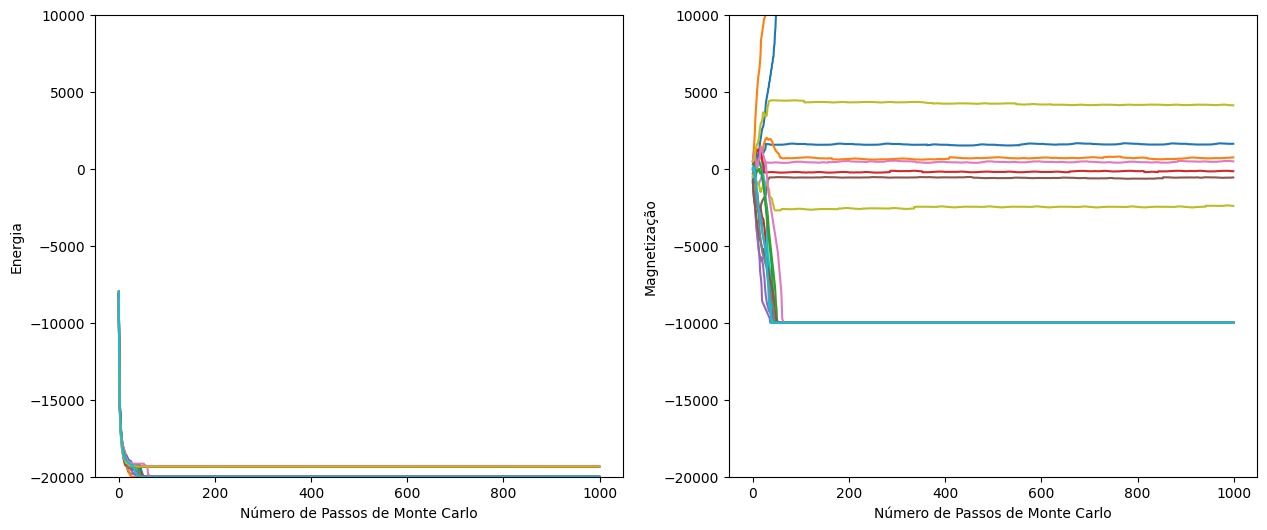

In [127]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-20000, 10000])
axs[1].set_ylim([-20000, 10000])
for i in range(20):
  energia_lista, mag_lista = Ising(100,0.4,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

precisa de cerca de 100 passos para alcançar a estabilidade, semelhante ao observado nos outros casos da mesma temperatura em casos diferentes

Temperatura = 0,8

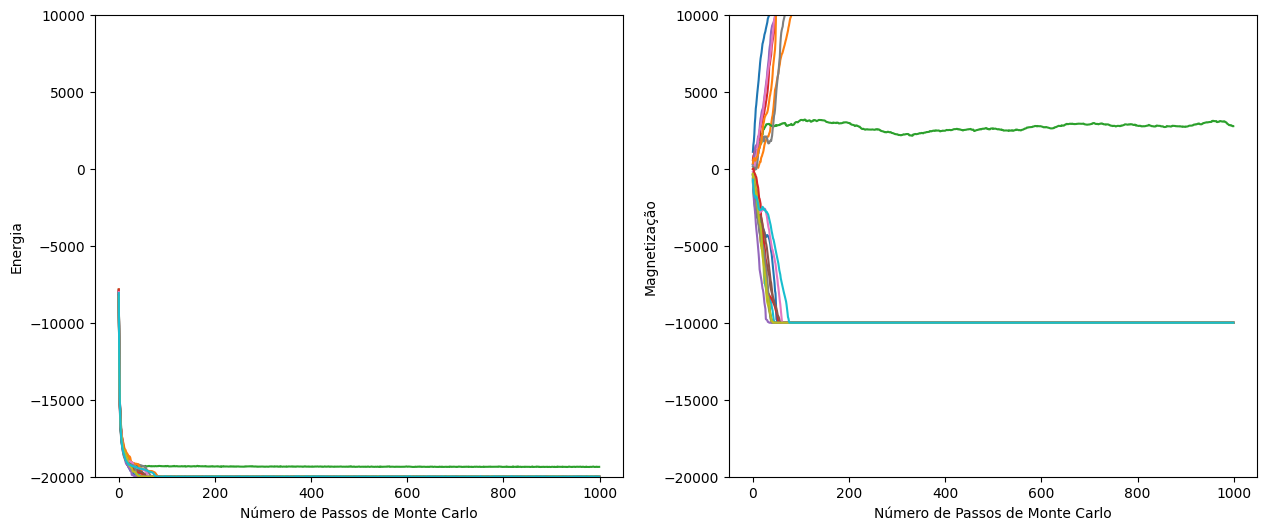

In [128]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-20000, 10000])
axs[1].set_ylim([-20000, 10000])
for i in range(20):
  energia_lista, mag_lista = Ising(100,0.8,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

A estabilidade é alcançada semelhantemente ao último caso, com L=80

Temperatura = 1.2

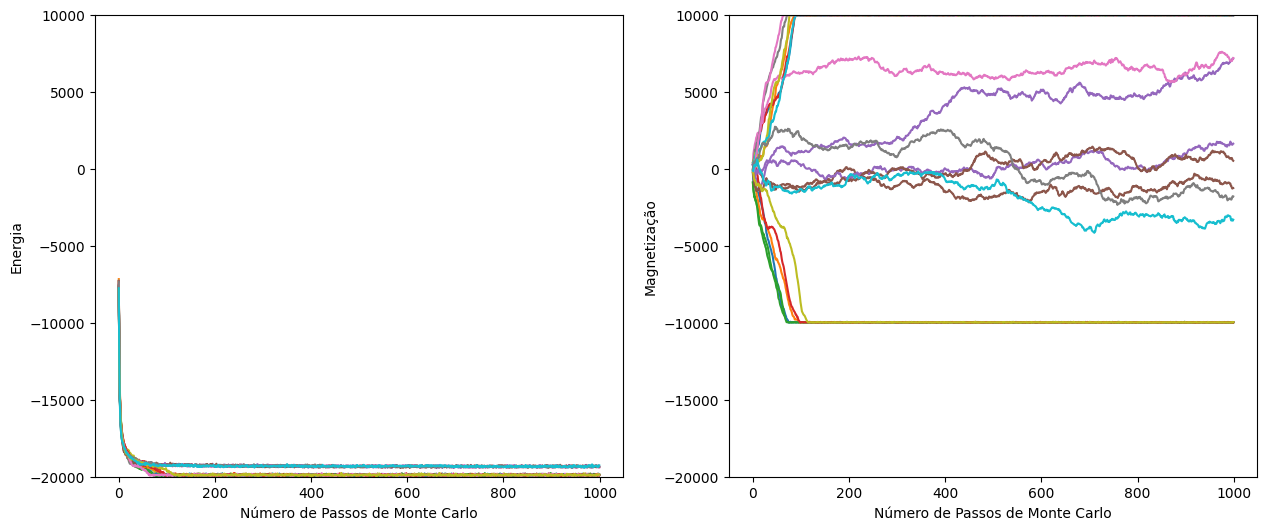

In [129]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-20000, 10000])
axs[1].set_ylim([-20000, 10000])
for i in range(20):
  energia_lista, mag_lista = Ising(100,1.2,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Esse caso é bem parecido com o caso de 0.4 visto anteriormente

Temperatura = 1.6

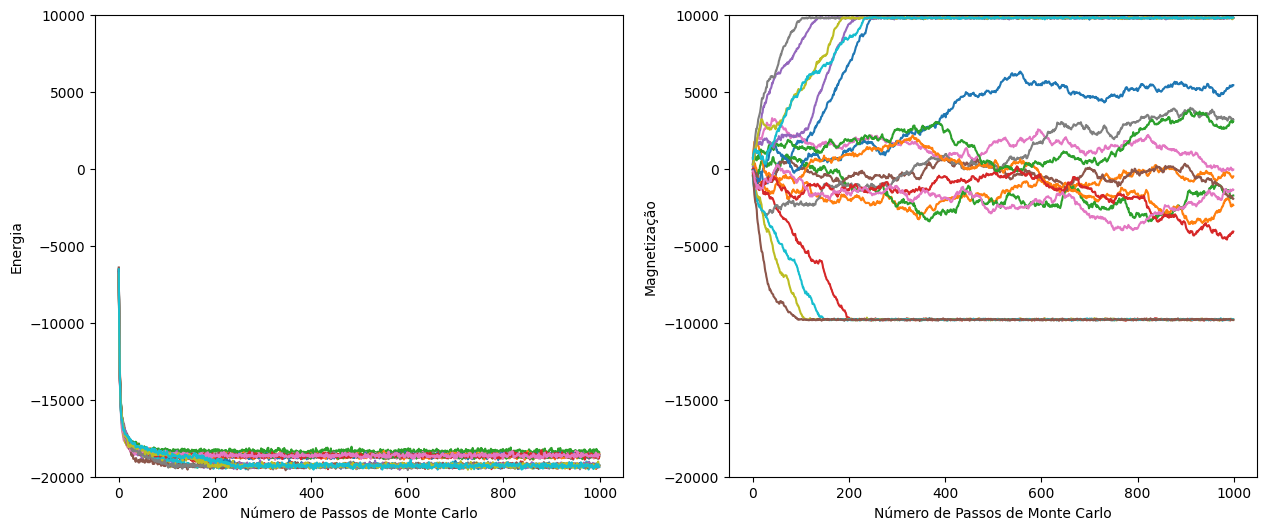

In [130]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-20000, 10000])
axs[1].set_ylim([-20000, 10000])
for i in range(20):
  energia_lista, mag_lista = Ising(100,1.6,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

A estabilidade nesse caso é alcançada com pouco menos  passos de Monte Carlo, que no caso anterior.

Temperatura = 2.0

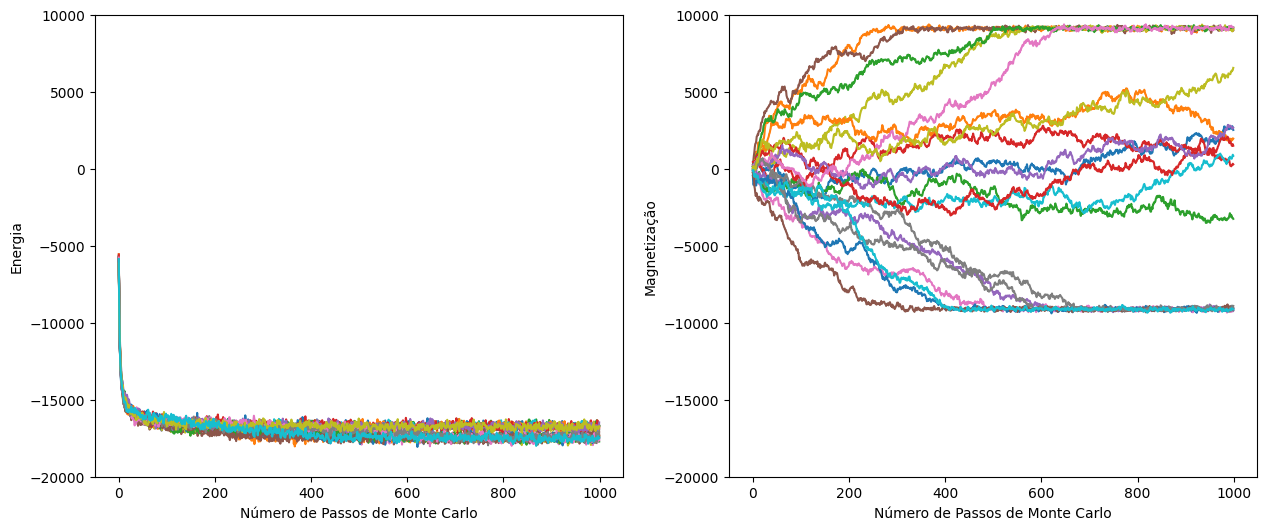

In [131]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-20000, 10000])
axs[1].set_ylim([-20000, 10000])
for i in range(20):
  energia_lista, mag_lista = Ising(100,2.0,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)


No caso da temperatura igual a 2, a estabilidade é alcançada bem rapidamente.



Temperatura = 2.4

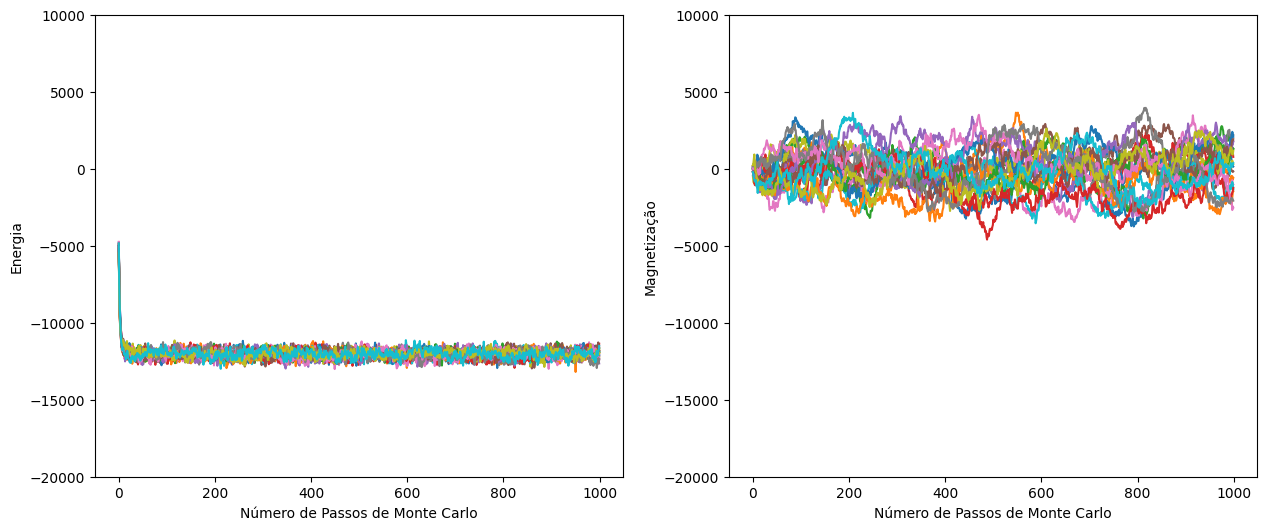

In [132]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-20000, 10000])
axs[1].set_ylim([-20000, 10000])
for i in range(20):
  energia_lista, mag_lista = Ising(100,2.4,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Com menos de 100 passos a estabilidade já é alcançada

Temperatura = 3.0

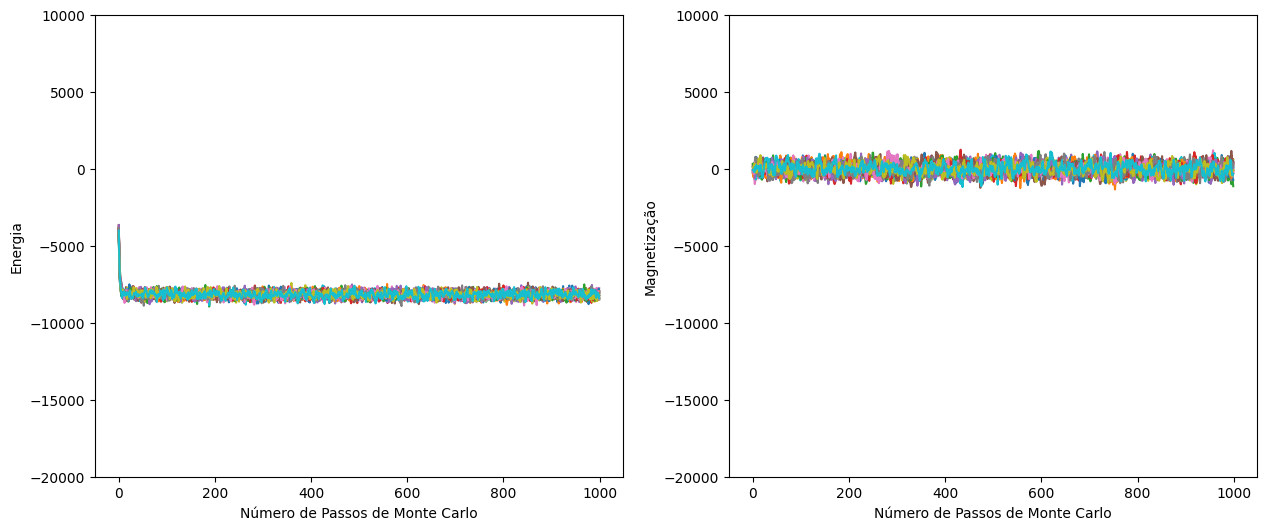

In [133]:
fig, axs = plt.subplots(1, 2,figsize=(15,6))
axs[0].set_ylabel("Energia")
axs[0].set_xlabel("Número de Passos de Monte Carlo")
axs[1].set_ylabel("Magnetização")
axs[1].set_xlabel("Número de Passos de Monte Carlo")
axs[0].set_ylim([-20000, 10000])
axs[1].set_ylim([-20000, 10000])
for i in range(20):
  energia_lista, mag_lista = Ising(100,3.0,1000)
  axs[0].plot(energia_lista)
  axs[1].plot(mag_lista)

Nesse último caso analisado para esse tamanho de L, podemos perceber que a estabilidade é alcançada muito rapidamente, precisando de cerca de 50 passos para alcançar a estabilidade almejada, confirmando a teoria proposta de que quanto maior a temperatura, menor o numero de passos necessários para alcançar a estabilidade.

# Conclusão

Para entender o funcionamento da Simulação de Monte Carlo no modelo de Ising, foi desenvolvido o código deste a partir, por sua vez, da aplicação do algoritmo de Metropolis. Uma vez pronto o código, foram realizados diversos testes, com diferentes temperaturas e tamanhos de rede. Mais especificamente, para cada rede de 24, 30, 50, 80 e 100 spins, foram testadas temperaturas de 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 3.0. Assim, ao plotar os gráficos de Energia e Magnetização para cada combinação possível de temperatura e tamanho de rede, foi possível chegar a algumas conclusões quanto à termalização do sistema.

Sendo Assim, foi possível perceber que, de forma geral, em altas temperaturas a região estacionária foi alcançada em menos passsos de Monte Carlo, enquanto em temperaturas mais baixas demorou mais para atingir o equilibrio, uma vez que o sistema tende a ficar preso em mínimos locais de energia. 

Além disso, no que tange o tamanho da rede, pode ser observado que, em geral, quanto maior a rede, maior o número de spins no sistema e, portanto, maior o número de interações entre eles. Isso pode levar a uma dinâmica mais lenta do sistema e a um maior número de passos de Monte Carlo necessários para atingir o equilíbrio termodinâmico.